# 0. Intro  
## 0.1 Author Bio

**Birth** 21.08.1993 - Cremona  

**University:**
  - 2012/2013 - Brescia $\rightarrow$ $1^{st}$ year of university, Mathematics degree at Università Cattolica. After doing the exams I started to see my real way: I love mathematics and theory but it must have an application as well.  
  - 2014/2015 - Parma $\rightarrow$ $2^{nd}$ and $3^{rd}$ years, Computer Science degree at Università degli Studi di Parma
  - 08.07.2015 - Graduation
  
**Moved to Florence:**
  - October 2015
    - Started working in a consulting firm in branch of DataWarehousing, analisys and reporting
    - Started studying for the $2^{nd}$ leved degree at Università degli Studi di Firenze
      
**Back home again:**
  - February 2020
    - Moved back in Cremona (maybe in the worst moment at all)
    - Started working in Data Management Tribe at ING (Milan)

## 0.2 Environment
I've been using Ubuntu since 2014 on my computer but in January I decided to dual-boot it in order to have a small Windows environment again for particular needs.  
Techincal details:
  - CPU: Intel$^{®}$ Core™ i7-5500U CPU @ 2.40GHz × 4 
  - RAM: 8GB
  - Model: Lenovo Z70
  - OS: Ubuntu 20.04 LTS (64-bit)
  - Python Interpreter: Python

Importing some modules...

In [1]:
import json
import pandas as pd
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display_html

---
# 1. Familiarize with the data
Take your time to familiarize with the data, especially its tree structure and write down a quick summary (git commits history, collaborators and maintainers, what it contains and whatever you observe).

The repository is a bit strange because it does not contain source code but just data and resources (pdf, ...) of different types, for this reason it can seem quite big.  
This repository is used by many people as we can notice from the number of forks (1.9k) and issues. As a matter of facts most of those issues are questions about interpretation and correctness of data.  
We can notice that there is just one main contributor (*umbros*) working for Dipartimento Protezione Civile Nazionale and a secondary contributor of that department (*pierluigicara*). Also other people appear in "contributors" page but they just made a few commits to fix some typos in comments or texts.

---
# 2. Load data
In this part, the files of our interest are: the one at  https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-regioni.json and its companion at https://github.com/pcm-dpc/COVID-19/blob/master/dati-json/dpc-covid19-ita-province.json

Load both of them in two different Python objects and inspect their contents, write down your thoughts and observations of their structure. You can both use plain Python dictionaries (for a preliminary step) and Pandas dataframes (required).

## First of all: Let's get updated data

In [2]:
covid_folder = "../COVID-19"
# If folder exists --> Get updated data, otherwise clone repo
!test -d "$covid_folder" \
    && git -C "$covid_folder" pull \
    || (git -C ".." clone https://github.com/pcm-dpc/COVID-19.git && mkdir -p Resources)
    
!cp -v "$covid_folder"/dati-json/dpc-covid19-ita-regioni.json Resources
!cp -v "$covid_folder"/dati-json/dpc-covid19-ita-province.json Resources

Già aggiornato.
'../COVID-19/dati-json/dpc-covid19-ita-regioni.json' -> 'Resources/dpc-covid19-ita-regioni.json'
'../COVID-19/dati-json/dpc-covid19-ita-province.json' -> 'Resources/dpc-covid19-ita-province.json'


## Load into Python Dataframes and inspect the content
### City Dataframe

In [3]:
with open('Resources/dpc-covid19-ita-province.json') as f:
    d = json.load(f)
cities  = pd.DataFrame(d)    

After importing the data we can easily notice that there are some dirty data

In [4]:
display(cities)
display(cities.loc[cities.denominazione_provincia == "In fase di definizione/aggiornamento"])

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...,...
18442,2020-07-13T17:00:00,ITA,5,Veneto,27,Venezia,VE,45.434905,12.338452,2700,
18443,2020-07-13T17:00:00,ITA,5,Veneto,28,Padova,PD,45.406930,11.876087,3987,
18444,2020-07-13T17:00:00,ITA,5,Veneto,29,Rovigo,RO,45.071073,11.790070,445,
18445,2020-07-13T17:00:00,ITA,5,Veneto,899,Fuori Regione / Provincia Autonoma,,NaN,NaN,331,


,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
7,2020-02-24T18:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
13,2020-02-24T18:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
19,2020-02-24T18:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
29,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,984,In fase di definizione/aggiornamento,None,NaN,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...,...
18418,2020-07-13T17:00:00,ITA,19,Sicilia,994,In fase di definizione/aggiornamento,,NaN,NaN,25,
18430,2020-07-13T17:00:00,ITA,9,Toscana,995,In fase di definizione/aggiornamento,,NaN,NaN,0,
18434,2020-07-13T17:00:00,ITA,10,Umbria,997,In fase di definizione/aggiornamento,,NaN,NaN,0,
18437,2020-07-13T17:00:00,ITA,2,Valle d'Aosta,998,In fase di definizione/aggiornamento,,NaN,NaN,0,


Let's check all columns to clean them.  
Firts of all let's define a utility function

In [5]:
def show_distinct(p_dataframe, p_column_name):
    # In this way we can manage single columns (passed as string) 
    # and multiple columns passed as list
    if not isinstance(p_column_name, list):
        p_column_name = [p_column_name]
    display(p_dataframe[p_column_name].drop_duplicates().sort_values(by = p_column_name))

#### Date
Here we don't have dirty data but date column can be converted to a Time Series to have correctly structured data

In [6]:
show_distinct(cities, 'data')

,data
0,2020-02-24T18:00:00
128,2020-02-25T18:00:00
256,2020-02-26T18:00:00
384,2020-02-27T18:00:00
512,2020-02-28T18:00:00
...,...
17702,2020-07-09T17:00:00
17851,2020-07-10T17:00:00
18000,2020-07-11T17:00:00
18149,2020-07-12T17:00:00


In [7]:
cities['data'] = pd.to_datetime(cities['data'], format = "%Y-%m-%dT%H:%M:%S")
display(cities[['data']].dtypes)

data    datetime64[ns]
dtype: object

#### Country
Nothing to do

In [8]:
show_distinct(cities, 'stato')

,stato
0,ITA


#### Region
There are some dirty data on Bolzano and Trento

In [9]:
show_distinct(cities, ['denominazione_regione', 'codice_regione'])

,denominazione_regione,codice_regione
0,Abruzzo,13
5,Basilicata,17
8,Calabria,18
14,Campania,15
20,Emilia-Romagna,8
30,Friuli Venezia Giulia,6
35,Lazio,12
41,Liguria,7
46,Lombardia,3
59,Marche,11


It seems that there are 2 rows for the same day in Bolzano and Trento. The duplicated rows have dirty city name, null lat, null long, ... 
In following cells we will clean those data

In [10]:
display(cities.loc[(cities.denominazione_regione == "P.A. Bolzano")\
                  ].sort_values(by = 'data').drop(columns = ['stato', \
                                                             'codice_regione', \
                                                             'denominazione_regione',\
                                                             'note']))
# Series with all dates of Bolzano "clean" data
bolzano_clean = cities.loc[(cities.denominazione_regione == "P.A. Bolzano") & \
                                   (cities.denominazione_provincia == "Bolzano"), 'data']

# Series with all dates of Bolzano "dirty" data
bolzano_dirty = cities.loc[(cities.denominazione_regione == "P.A. Bolzano") & \
                           (cities.denominazione_provincia != "Bolzano"), 'data']

,data,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
68,2020-02-24 18:00:00,21,Bolzano,BZ,46.499335,11.356624,0
69,2020-02-24 18:00:00,981,In fase di definizione/aggiornamento,None,NaN,NaN,0
196,2020-02-25 18:00:00,21,Bolzano,BZ,46.499335,11.356624,1
197,2020-02-25 18:00:00,981,In fase di definizione/aggiornamento,None,NaN,NaN,0
324,2020-02-26 18:00:00,21,Bolzano,BZ,46.499335,11.356624,1
...,...,...,...,...,...,...,...
18228,2020-07-12 17:00:00,21,Bolzano,BZ,46.499335,11.356624,2666
18230,2020-07-12 17:00:00,981,In fase di definizione/aggiornamento,,NaN,NaN,0
18378,2020-07-13 17:00:00,881,Fuori Regione / Provincia Autonoma,,NaN,NaN,0
18377,2020-07-13 17:00:00,21,Bolzano,BZ,46.499335,11.356624,2673


Check that all dates of bolzano_dirty are included in bolzano_clean

In [11]:
display(bolzano_dirty.subtract(bolzano_clean).drop_duplicates())

cities.drop(cities[(cities.denominazione_regione == "P.A. Bolzano") & \
                   (cities.denominazione_provincia != "Bolzano")].index, inplace = True)

68   NaT
Name: data, dtype: timedelta64[ns]

Bolzano's data are splitted on 2 different region codes, likely an error, the right one is 4 (in common with Trento)

In [12]:
before_styler = cities.groupby(['denominazione_regione', 'codice_regione']).nunique()[['data']].style.set_table_attributes("style='display:inline'").set_caption("Before")
cities.loc[cities.codice_regione == 21, 'codice_regione'] = 4
after_styler = cities.groupby(['denominazione_regione', 'codice_regione']).nunique()[['data']].style.set_table_attributes("style='display:inline'").set_caption("After")
display_html(before_styler._repr_html_() + " " + after_styler._repr_html_(), raw=True)

,,data
denominazione_regione,codice_regione,
Abruzzo,13,141
Basilicata,17,141
Calabria,18,141
Campania,15,141
Emilia-Romagna,8,141
Friuli Venezia Giulia,6,141
Lazio,12,141
Liguria,7,141
Lombardia,3,141


Trento has the same duplicated data and wrong region code, we will do same operations as above (no comments)

In [13]:
display(cities.loc[(cities.denominazione_regione == "P.A. Trento")\
                  ].sort_values(by = 'data').drop(columns = ['stato', \
                                                             'codice_regione', \
                                                             'denominazione_regione',\
                                                             'note']))
trento_clean = cities.loc[(cities.denominazione_regione == "P.A. Trento") & \
                          (cities.denominazione_provincia == "Trento"), 'data']

trento_dirty = cities.loc[(cities.denominazione_regione == "P.A. Trento") & \
                          (cities.denominazione_provincia != "Trento"), 'data']

cities.drop(cities[(cities.denominazione_regione == "P.A. Trento") & \
                   (cities.denominazione_provincia != "Trento")].index, inplace = True)
cities.loc[cities.codice_regione == 22, 'codice_regione'] = 4

,data,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
70,2020-02-24 18:00:00,22,Trento,TN,46.068935,11.121231,0
71,2020-02-24 18:00:00,996,In fase di definizione/aggiornamento,None,NaN,NaN,0
198,2020-02-25 18:00:00,22,Trento,TN,46.068935,11.121231,0
199,2020-02-25 18:00:00,996,In fase di definizione/aggiornamento,None,NaN,NaN,0
326,2020-02-26 18:00:00,22,Trento,TN,46.068935,11.121231,0
...,...,...,...,...,...,...,...
18231,2020-07-12 17:00:00,22,Trento,TN,46.068935,11.121231,4881
18233,2020-07-12 17:00:00,996,In fase di definizione/aggiornamento,,NaN,NaN,0
18381,2020-07-13 17:00:00,896,Fuori Regione / Provincia Autonoma,,NaN,NaN,0
18380,2020-07-13 17:00:00,22,Trento,TN,46.068935,11.121231,4881


Correct region name

In [14]:
cities.loc[cities.codice_regione == 4, 'denominazione_regione'] = "Trentino-Alto Adige"
display(cities.groupby(['denominazione_regione', 'codice_regione']).nunique()[['data']])

,,data
denominazione_regione,codice_regione,
Abruzzo,13,141
Basilicata,17,141
Calabria,18,141
Campania,15,141
Emilia-Romagna,8,141
Friuli Venezia Giulia,6,141
Lazio,12,141
Liguria,7,141
Lombardia,3,141


In [15]:
cities.loc[(cities.codice_regione == 13) & (cities.data == pd.to_datetime("2020-02-24 18:00:00"))]

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,None
1,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,None
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,None
3,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,None
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,None,NaN,NaN,0,None


#### City
There are still some dirty rows, some regions seems to have too many cities, some "updating" rows.

In [16]:
display(cities.groupby(['denominazione_regione', 'codice_regione']).nunique()[['codice_provincia', 'denominazione_provincia']])
display(cities.loc[cities.denominazione_regione == 'Abruzzo'].groupby(['denominazione_regione', 'codice_regione', 'codice_provincia', 'denominazione_provincia']).nunique(['data']))

,,codice_provincia,denominazione_provincia
denominazione_regione,codice_regione,,
Abruzzo,13,6,6
Basilicata,17,4,4
Calabria,18,7,7
Campania,15,7,7
Emilia-Romagna,8,11,11
Friuli Venezia Giulia,6,6,6
Lazio,12,7,7
Liguria,7,6,6
Lombardia,3,14,14


data  \
denominazione_regione codice_regione codice_provincia denominazione_provincia                      
Abruzzo               13             66               L'Aquila                               141   
                                     67               Teramo                                 141   
                                     68               Pescara                                141   
                                     69               Chieti                                 141   
                                     879              Fuori Regione / Provincia Autonoma      19   
                                     979              In fase di definizione/aggiornamento   141   

                                                                                            stato  \
denominazione_regione codice_regione codice_provincia denominazione_provincia                       
Abruzzo               13             66               L'Aquila                                  1   
                                     67               Teramo                                    1   
                                     68               Pescara                                   1   
                                     69               Chieti                                    1   
                                     879              Fuori Regione / Provincia Autonoma        1   
                                     979              In fase di definizione/aggiornamento      1   

                                                                                            codice_regione  \
denominazione_regione codice_regione codice_provincia denominazione_provincia                                
Abruzzo               13             66               L'Aquila                                           1   
                                     67               Teramo                                             1   
                                     68               Pescara                                            1   
                                     69               Chieti                                             1   
                                     879              Fuori Regione / Provincia Autonoma                 1   
                                     979              In fase di definizione/aggiornamento               1   

                                                                                            denominazione_regione  \
denominazione_regione codice_regione codice_provincia denominazione_provincia                                       
Abruzzo               13             66               L'Aquila                                                  1   
                                     67               Teramo                                                    1   
                                     68               Pescara                                                   1   
                                     69               Chieti                                                    1   
                                     879              Fuori Regione / Provincia Autonoma                        1   
                                     979              In fase di definizione/aggiornamento                      1   

                                                                                            codice_provincia  \
denominazione_regione codice_regione codice_provincia denominazione_provincia                                  
Abruzzo               13             66               L'Aquila                                             1   
                                     67               Teramo                                               1   
                                     68               Pescara                                              1   
                                     69               Chieti                                            

The real cities of the region have the correct number of dates (rows), so we can drop those "dirty" rows

In [17]:
cities.drop(cities[cities['denominazione_provincia'].isin(('Fuori Regione / Provincia Autonoma',\
                                                           'In fase di definizione',\
                                                           'In fase di definizione/aggiornamento'))].index,\
            inplace = True)

display(cities.groupby(['denominazione_regione', 'codice_regione']).nunique()[['codice_provincia', 'denominazione_provincia']])

,,codice_provincia,denominazione_provincia
denominazione_regione,codice_regione,,
Abruzzo,13,4,4
Basilicata,17,2,2
Calabria,18,5,5
Campania,15,5,5
Emilia-Romagna,8,9,9
Friuli Venezia Giulia,6,4,4
Lazio,12,5,5
Liguria,7,4,4
Lombardia,3,12,12


There is also a null city short name, we can correct it

In [18]:
display(cities.loc[cities.sigla_provincia.astype(str).map(len) != 2, ['denominazione_provincia', 'sigla_provincia']])
cities.loc[(cities.sigla_provincia.astype(str).map(len) != 2) &\
           (cities.denominazione_provincia == 'Napoli'), 'sigla_provincia'] = "NA"
display(cities.loc[cities.sigla_provincia.astype(str).map(len) != 2, ['denominazione_provincia', 'sigla_provincia']])

,denominazione_provincia,sigla_provincia
16380,Napoli,None


,denominazione_provincia,sigla_provincia


#### Position
Latitude and logintude with 0 value have already been cleaned in previous steps

In [19]:
lat_styler = cities[['lat']].drop_duplicates().sort_values(by = 'lat').style.set_table_attributes("style='display:inline'").set_caption("Sort by Lat")
long_styler = cities[['long']].drop_duplicates().sort_values(by = 'long').style.set_table_attributes("style='display:inline'").set_caption("Sort by Long")
display_html(lat_styler._repr_html_() + " " + long_styler._repr_html_(), raw=True)

,lat
101,36.925092
102,37.059917
97,37.309711
98,37.492132
100,37.502878
99,37.567057
94,38.018501
10,38.109228
95,38.115697
96,38.193958


#### Number of cases
Nothing to do

In [20]:
display(cities[['totale_casi']].drop_duplicates().sort_values(by = 'totale_casi'))

,totale_casi
0,0
156,1
307,2
151,3
149,4
...,...
17759,24555
17908,24572
18057,24598
18206,24604


### Region Dataframe

In [21]:
with open('Resources/dpc-covid19-ita-regioni.json') as f:
    d = json.load(f)
regions  = pd.DataFrame(d)    

After importing the data we can easily notice that there are some dirty data

In [22]:
regions

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,NaN,NaN,0,5,NaN,None
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,NaN,NaN,0,0,NaN,None
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,NaN,NaN,0,1,NaN,None
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,NaN,NaN,0,10,NaN,None
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,NaN,NaN,18,148,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,2020-07-13T17:00:00,ITA,19,Sicilia,38.115697,13.362357,6,0,6,117,...,0,1,2694,283,2749.0,351.0,3100,235954,190293.0,None
2957,2020-07-13T17:00:00,ITA,9,Toscana,43.769231,11.255889,7,3,10,325,...,4,4,8869,1122,10105.0,221.0,10326,372853,250093.0,None
2958,2020-07-13T17:00:00,ITA,10,Umbria,43.106758,12.388247,4,0,4,4,...,-1,0,1362,80,1434.0,16.0,1450,106265,70762.0,None
2959,2020-07-13T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,2,0,2,1,...,0,0,1047,146,1079.0,117.0,1196,19599,14554.0,None


#### NaN
Some numeric fields have some NaN values

In [23]:
regions.fillna({col : 0 for col in regions.columns[6:-1]}, inplace = True)

#### Date
Here we don't have dirty data but date column can be converted to a Time Series to have correctly structured data

In [24]:
show_distinct(regions, 'data')

,data
0,2020-02-24T18:00:00
21,2020-02-25T18:00:00
42,2020-02-26T18:00:00
63,2020-02-27T18:00:00
84,2020-02-28T18:00:00
...,...
2856,2020-07-09T17:00:00
2877,2020-07-10T17:00:00
2898,2020-07-11T17:00:00
2919,2020-07-12T17:00:00


In [25]:
regions['data'] = pd.to_datetime(regions['data'], format = "%Y-%m-%dT%H:%M:%S")
display(regions[['data']].dtypes)

data    datetime64[ns]
dtype: object

#### Country
Nothing to do

In [26]:
show_distinct(regions, 'stato')

,stato
0,ITA


#### Region
Same problem of City dataframe with "dirty" region name and code on Trento and Bolzano. In this case we have to:
  - Update Bolzano and Trento region name and region code.
  - Overwrite lat and long of Bolzano rows with info from Trento. 
    In all other rows lat and long point to capital of the region
  - Aggregate Bolzano and Trento data in a single row for each day

In [27]:
type(regions.loc[regions.codice_regione == 22, ['lat']].iloc[0, 0])

numpy.float64

In [28]:
before_styler = regions[['denominazione_regione', 'codice_regione']].drop_duplicates().sort_values(by = ['denominazione_regione', 'codice_regione']).style.set_table_attributes("style='display:inline'").set_caption("Before")
regions.loc[regions.codice_regione == 21, 'lat'] = regions.loc[regions.codice_regione == 22, ['lat']].iloc[0, 0]
regions.loc[regions.codice_regione == 21, 'long'] = regions.loc[regions.codice_regione == 22, ['long']].iloc[0, 0]
regions.loc[regions.codice_regione == 21, 'codice_regione'] = 4
regions.loc[regions.codice_regione == 22, 'codice_regione'] = 4
regions.loc[regions.codice_regione == 4, 'denominazione_regione'] = "Trentino-Alto Adige"
after_styler = regions[['denominazione_regione', 'codice_regione']].drop_duplicates().sort_values(by = ['denominazione_regione', 'codice_regione']).style.set_table_attributes("style='display:inline'").set_caption("After")
display_html(before_styler._repr_html_() + " " + after_styler._repr_html_(), raw=True)

,denominazione_regione,codice_regione
0,Abruzzo,13
1,Basilicata,17
2,Calabria,18
3,Campania,15
4,Emilia-Romagna,8
5,Friuli Venezia Giulia,6
6,Lazio,12
7,Liguria,7
8,Lombardia,3
9,Marche,11


After merging Bolzano and Trento in the same region we have to aggregate their data grouping by date

In [29]:
trentino = regions.loc[regions.codice_regione == 4].groupby(['data', \
                                                             'stato', \
                                                             'codice_regione', \
                                                             'denominazione_regione', \
                                                             'lat', 'long'], \
                                                            as_index = False).sum().copy()
regions.drop(regions.loc[regions.codice_regione == 4].index, inplace = True)
regions.append(trentino)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,...,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,...,0,0,0,0,0.0,0.0,0,5,0.0,None
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,...,0,0,0,0,0.0,0.0,0,0,0.0,None
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,...,0,0,0,0,0.0,0.0,0,1,0.0,None
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,...,0,0,0,0,0.0,0.0,0,10,0.0,None
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,...,0,18,0,0,0.0,0.0,18,148,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2020-07-09 17:00:00,ITA,4,Trentino-Alto Adige,46.068935,11.121231,7,0,7,110,...,-3,3,6715,697,6033.0,1496.0,7529,219831,110008.0,NaN
137,2020-07-10 17:00:00,ITA,4,Trentino-Alto Adige,46.068935,11.121231,7,0,7,106,...,-4,8,6727,697,6038.0,1499.0,7537,221691,110744.0,NaN
138,2020-07-11 17:00:00,ITA,4,Trentino-Alto Adige,46.068935,11.121231,8,0,8,102,...,-3,5,6735,697,6042.0,1500.0,7542,223223,111585.0,NaN
139,2020-07-12 17:00:00,ITA,4,Trentino-Alto Adige,46.068935,11.121231,8,0,8,106,...,4,5,6736,697,6047.0,1500.0,7547,225598,112480.0,NaN


#### Position
Nothing to do

In [30]:
lat_styler = regions[['lat']].drop_duplicates().sort_values(by = 'lat').style.set_table_attributes("style='display:inline'").set_caption("Sort by Lat")
long_styler = regions[['long']].drop_duplicates().sort_values(by = 'long').style.set_table_attributes("style='display:inline'").set_caption("Sort by Long")
display_html(lat_styler._repr_html_() + " " + long_styler._repr_html_(), raw=True)

,lat
16,38.115697
2,38.905976
15,39.215312
1,40.639471
3,40.839566
14,41.125596
10,41.557748
6,41.892770
0,42.351222
18,43.106758


---
# 3. Describe data 
Describe data using Pandas features and provide some plots according to your intuition (start small following the examples that we had done together); also, feel free to explore some connections you find interesting.
  - Provide visualizations such as plots, box-plots and scatter matrices (have a look at https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html  for inspiration).
  - The more combination you explore the better, in the sense to combine in the same figure multiple subplots or data series.  

The two files are correlated in the sense that the second adds details to the first. Figure 
out the connections and build new Pandas dataframes that use hierarchy indexes. Also perform some interesting marginalizations you like to report.
  - For instance, we expect to see a dataframe that is indexed by an outermost level of regions and an inner level of provinces; accordingly, the rows should report data with respect to this index.

The more graphics, descriptions and Pandas manipulation you experiment the better.  

First of all, we use cities long and lat to display a map of Italy, each point color will depend of average of total number of cases.

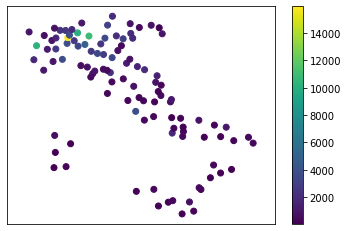

In [31]:
italy_map = cities[['lat', 'long', 'totale_casi']].groupby(['lat', 'long'], \
                                                           as_index = False).aggregate('mean')
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin = italy_map['totale_casi'].min(), \
                            vmax = italy_map.totale_casi.max())
plt.scatter(italy_map[['long']], italy_map[['lat']], \
            c = italy_map['totale_casi'].tolist(), cmap = cmap, norm = norm)
plt.colorbar()
plt.axis('equal')
plt.tick_params(axis = 'both', bottom = False, labelbottom = False, left = False, \
                labelleft = False)


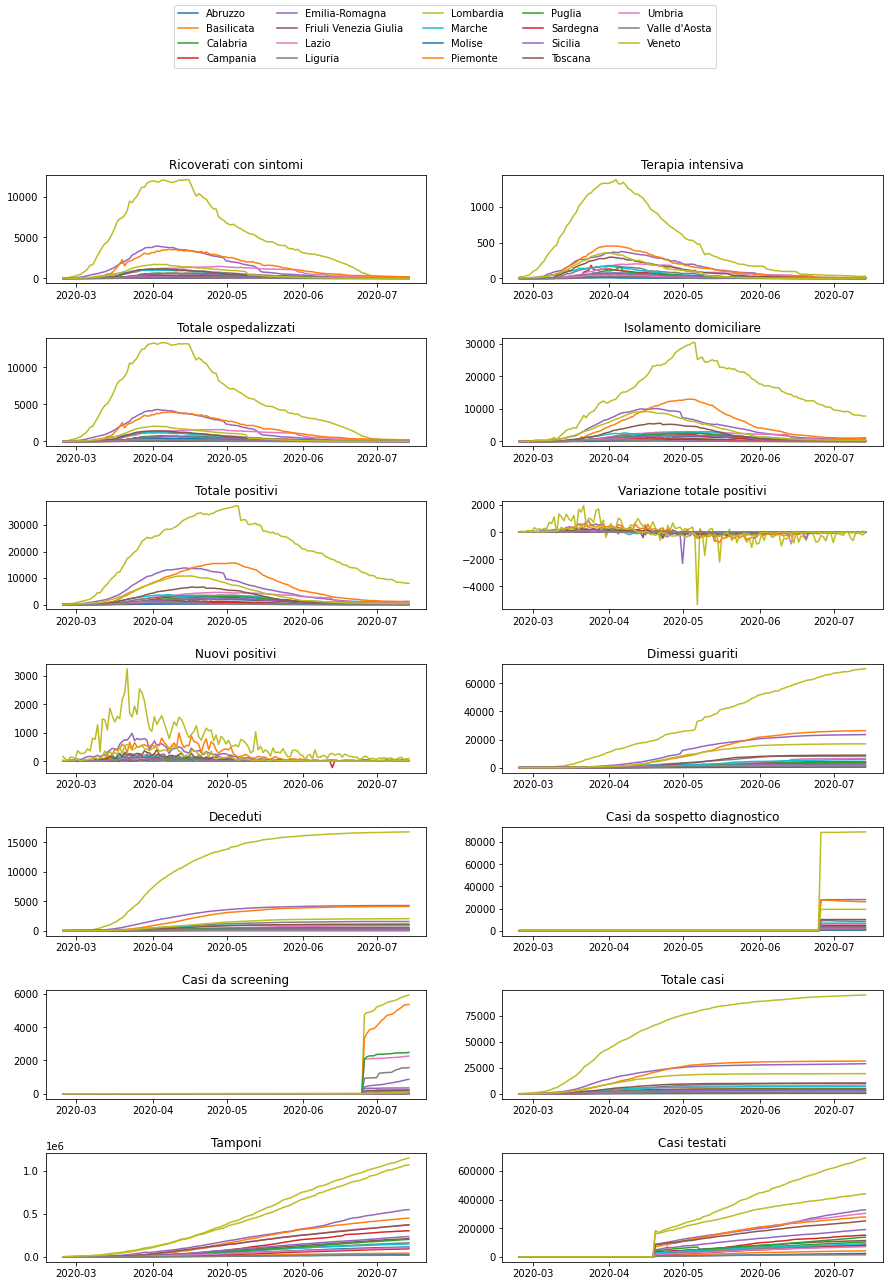

In [32]:
num = 0
fig = plt.figure(figsize = (15, 20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
for column in regions.columns[6:-1]:
    num += 1
    plt.subplot(7, 2, num)
 
    for region in regions.denominazione_regione.unique():
        cur_region = regions.loc[regions.denominazione_regione == region]
        plt.plot('data', column, data = cur_region, label = region)
 
    plt.title(column.replace('_', ' ').capitalize())
    
    
lines, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol = 5);
plt.show()

We can also build the same plots with boxes to view aggregated data of all regions

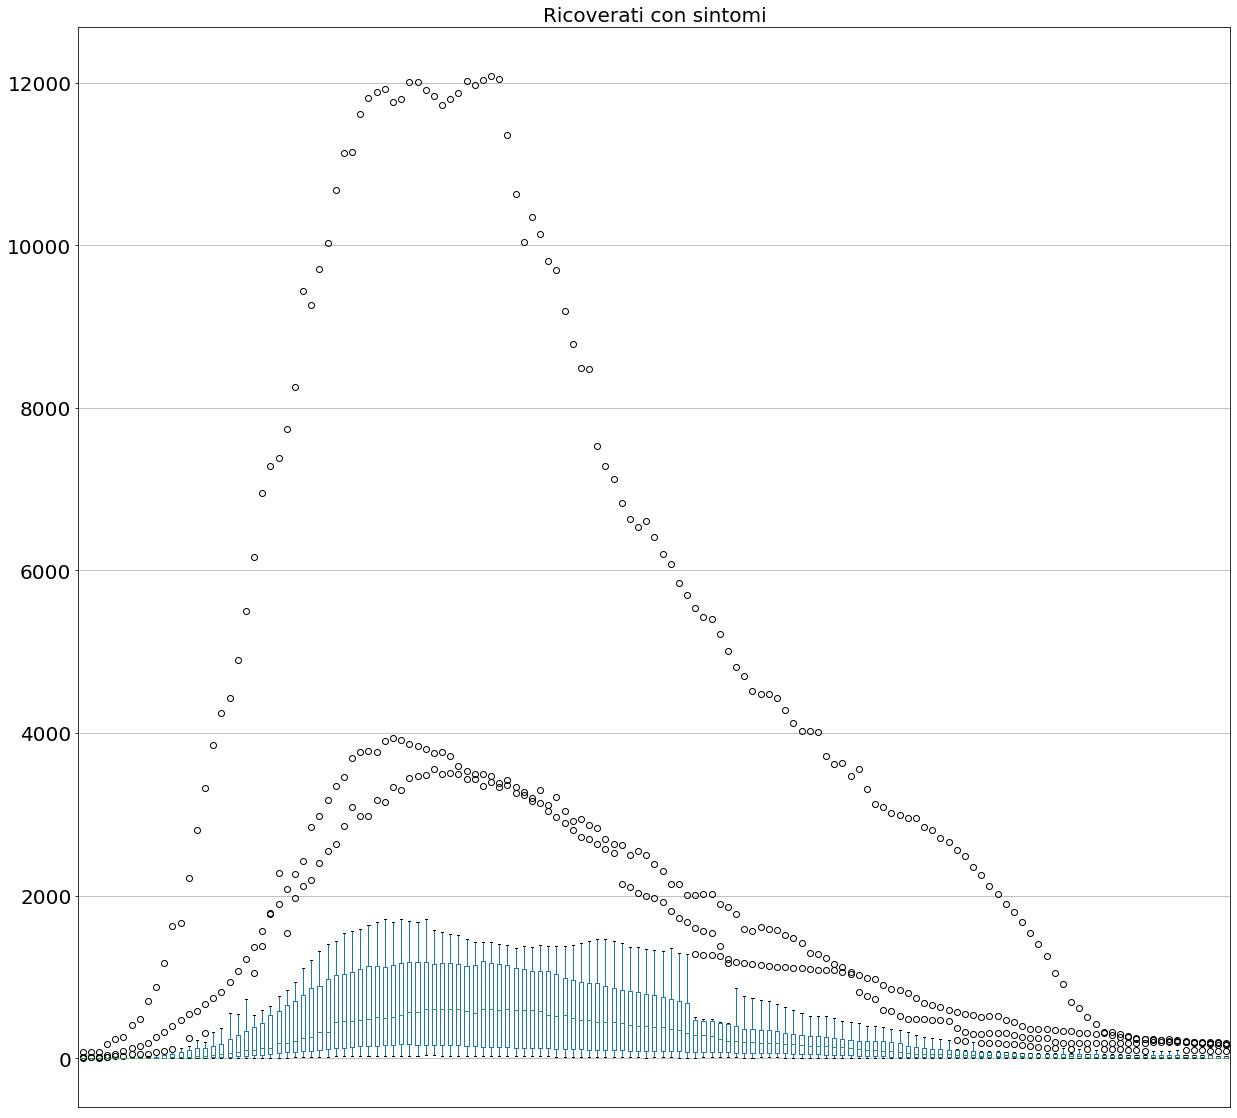

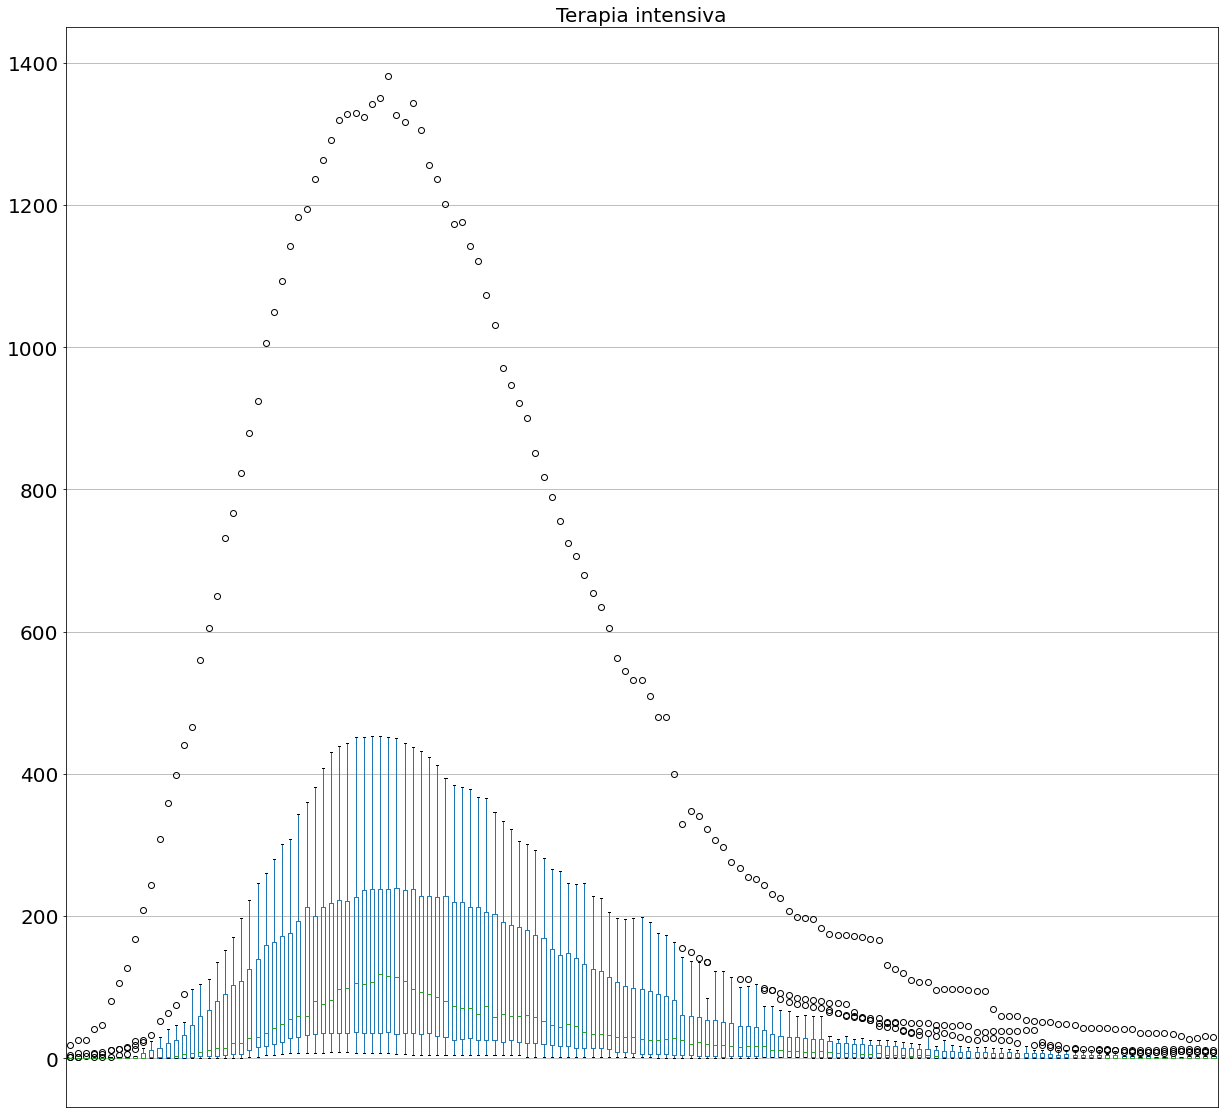

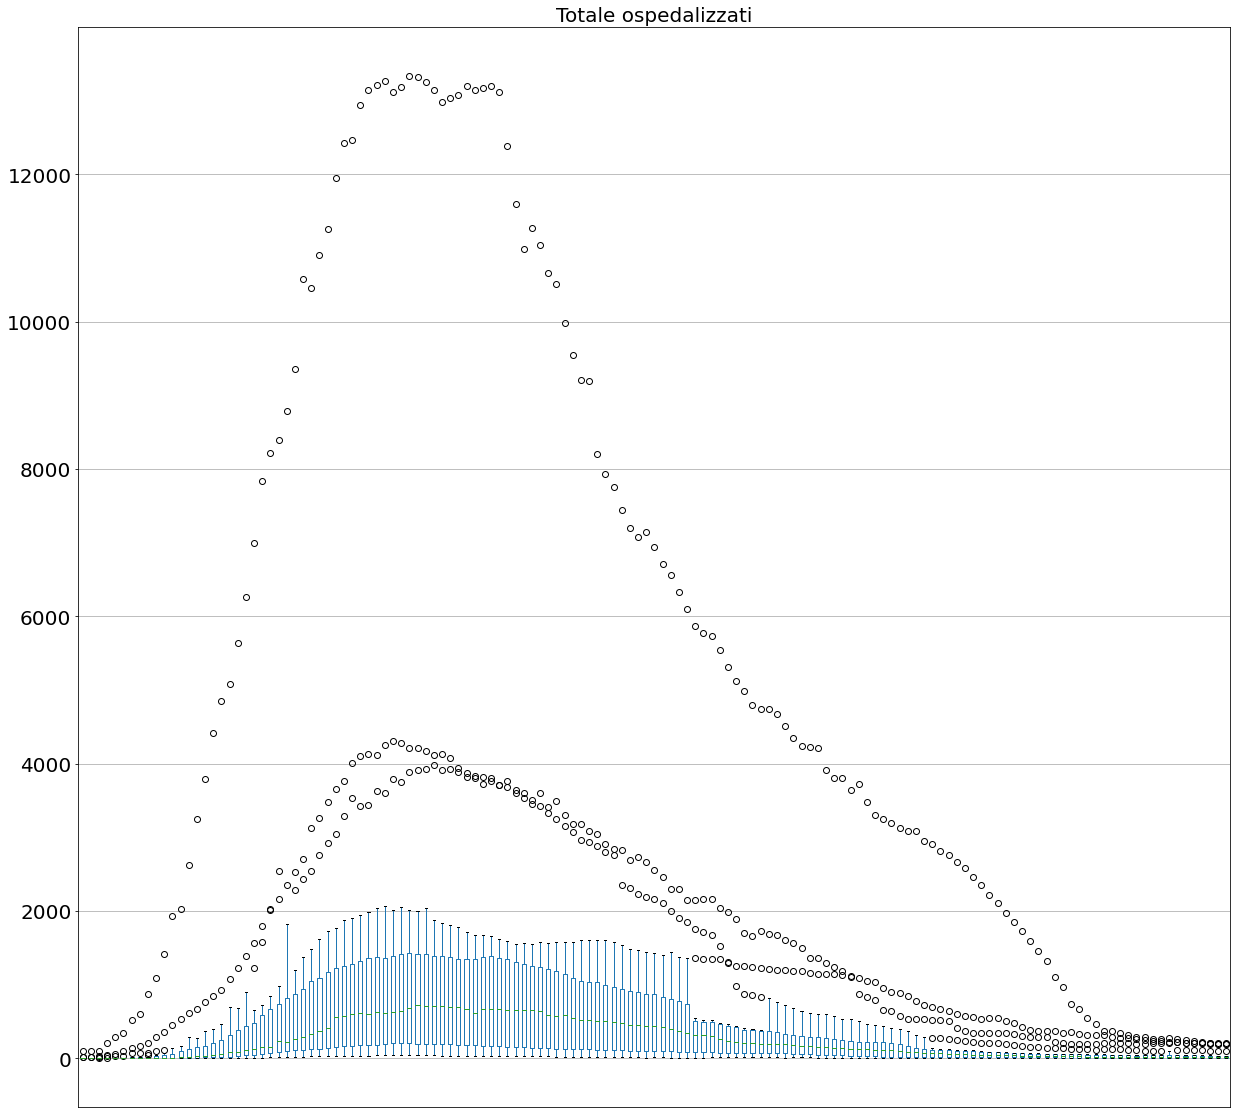

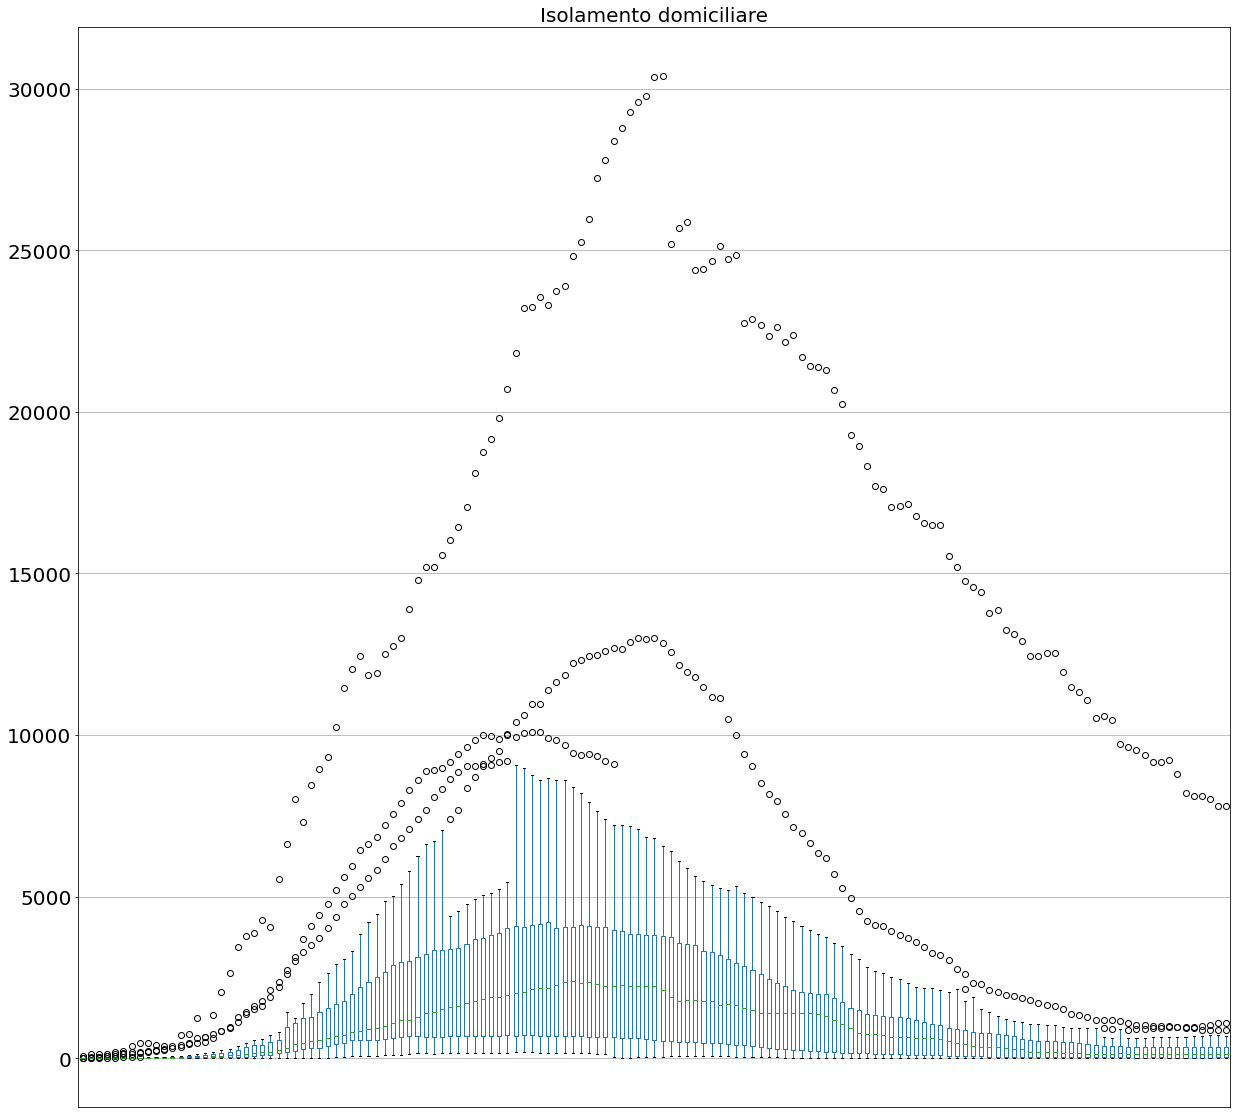

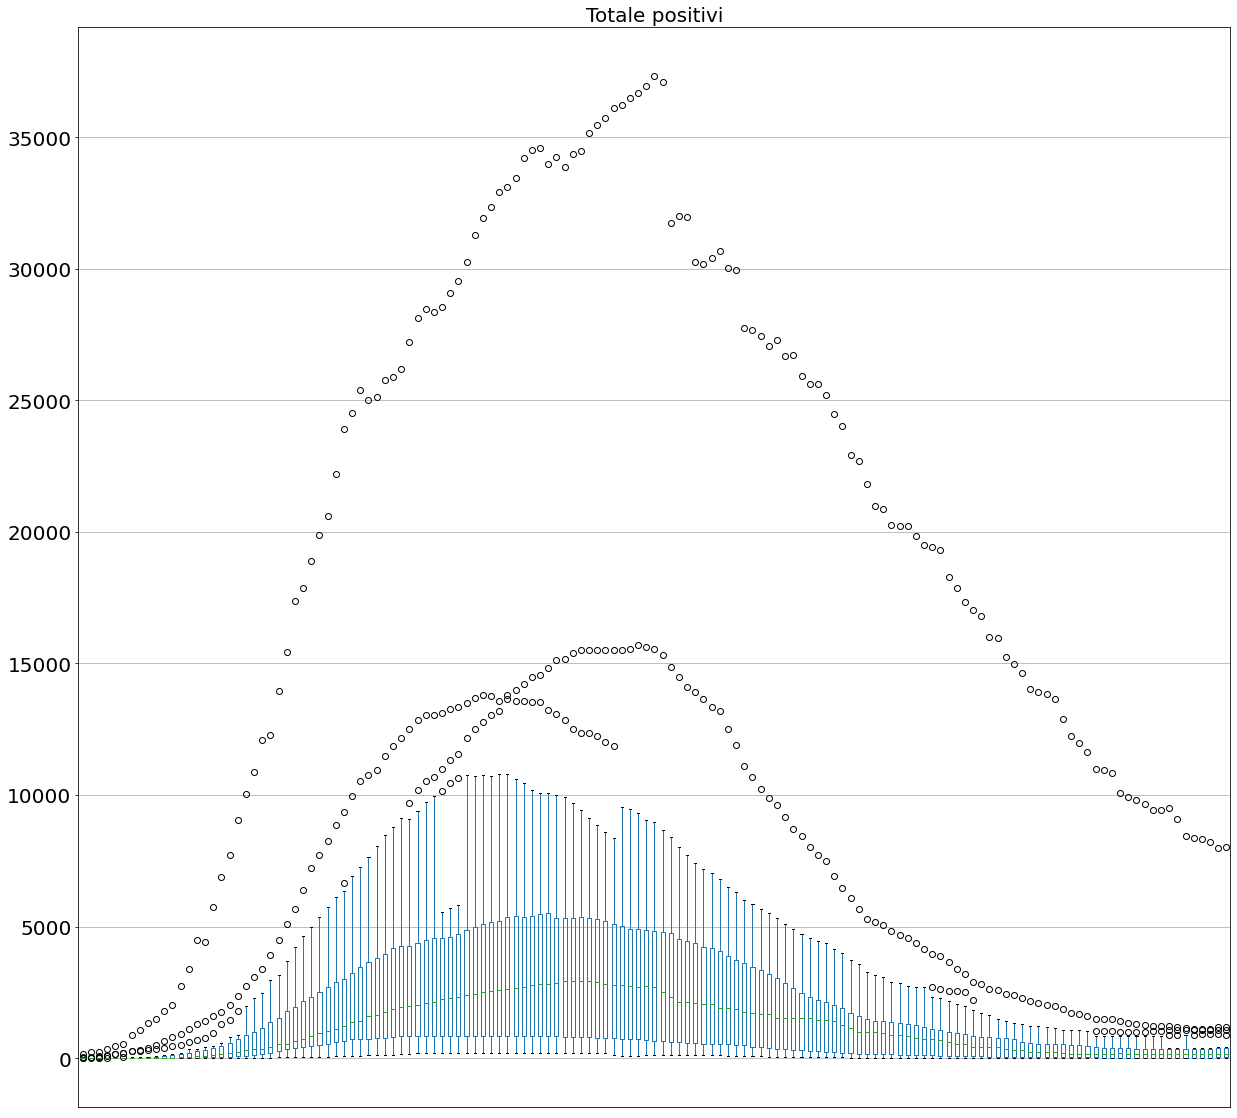

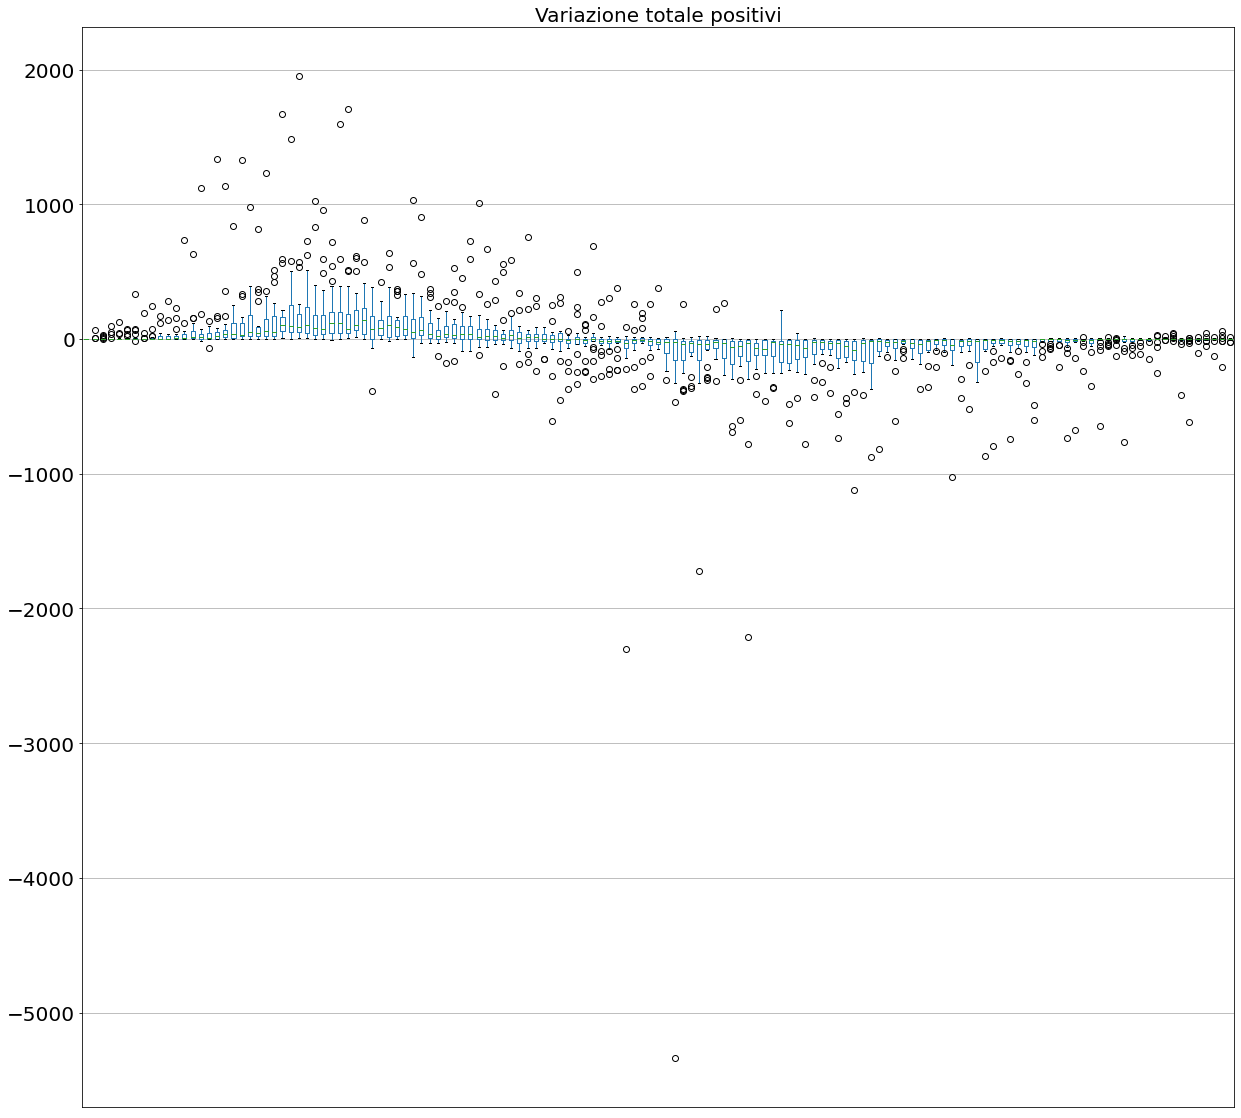

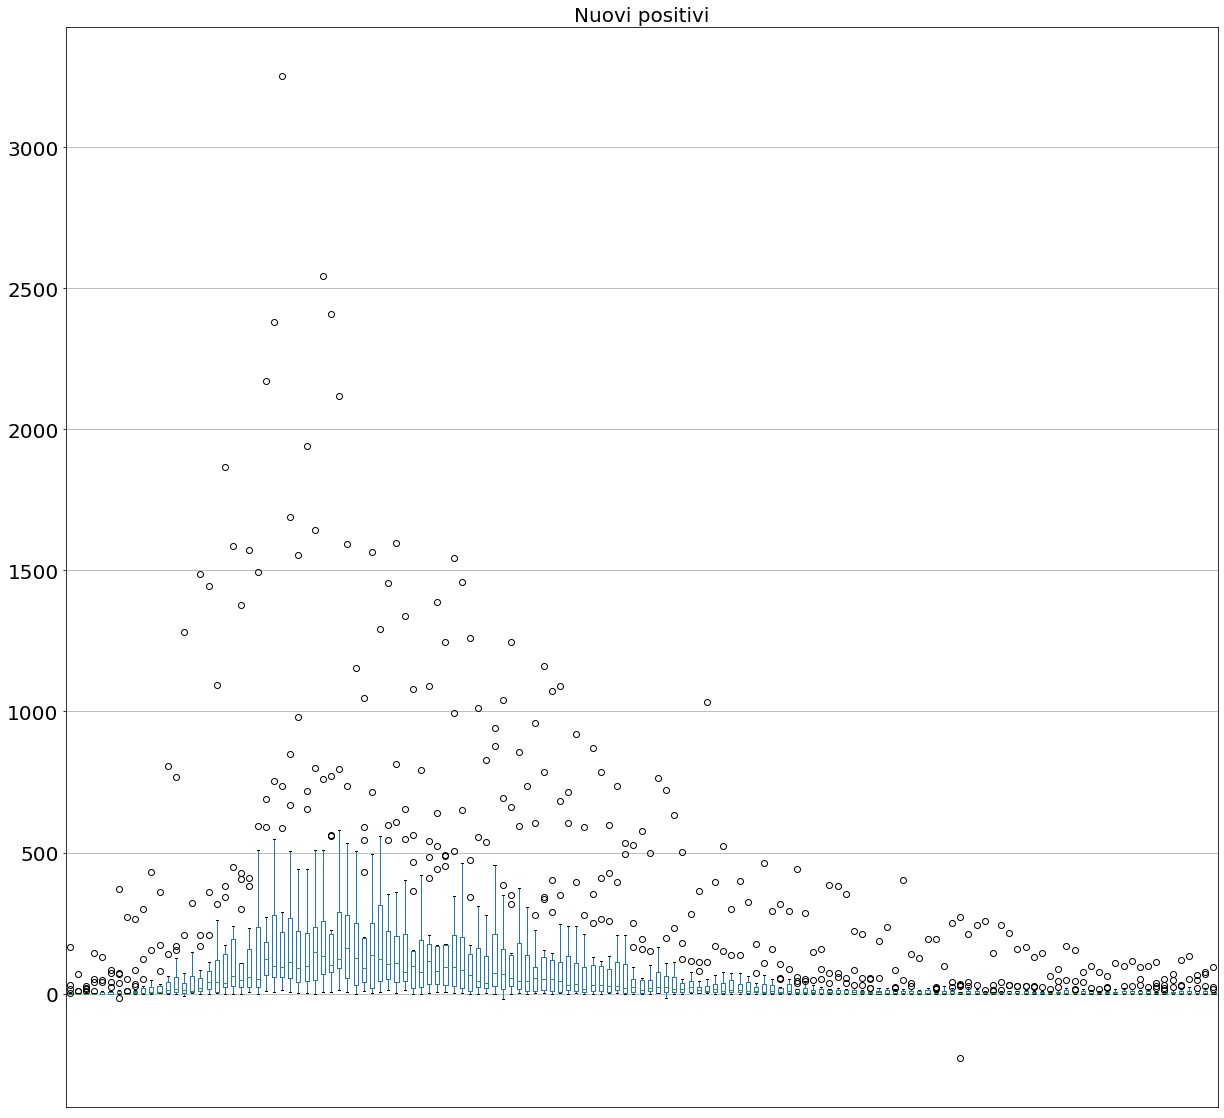

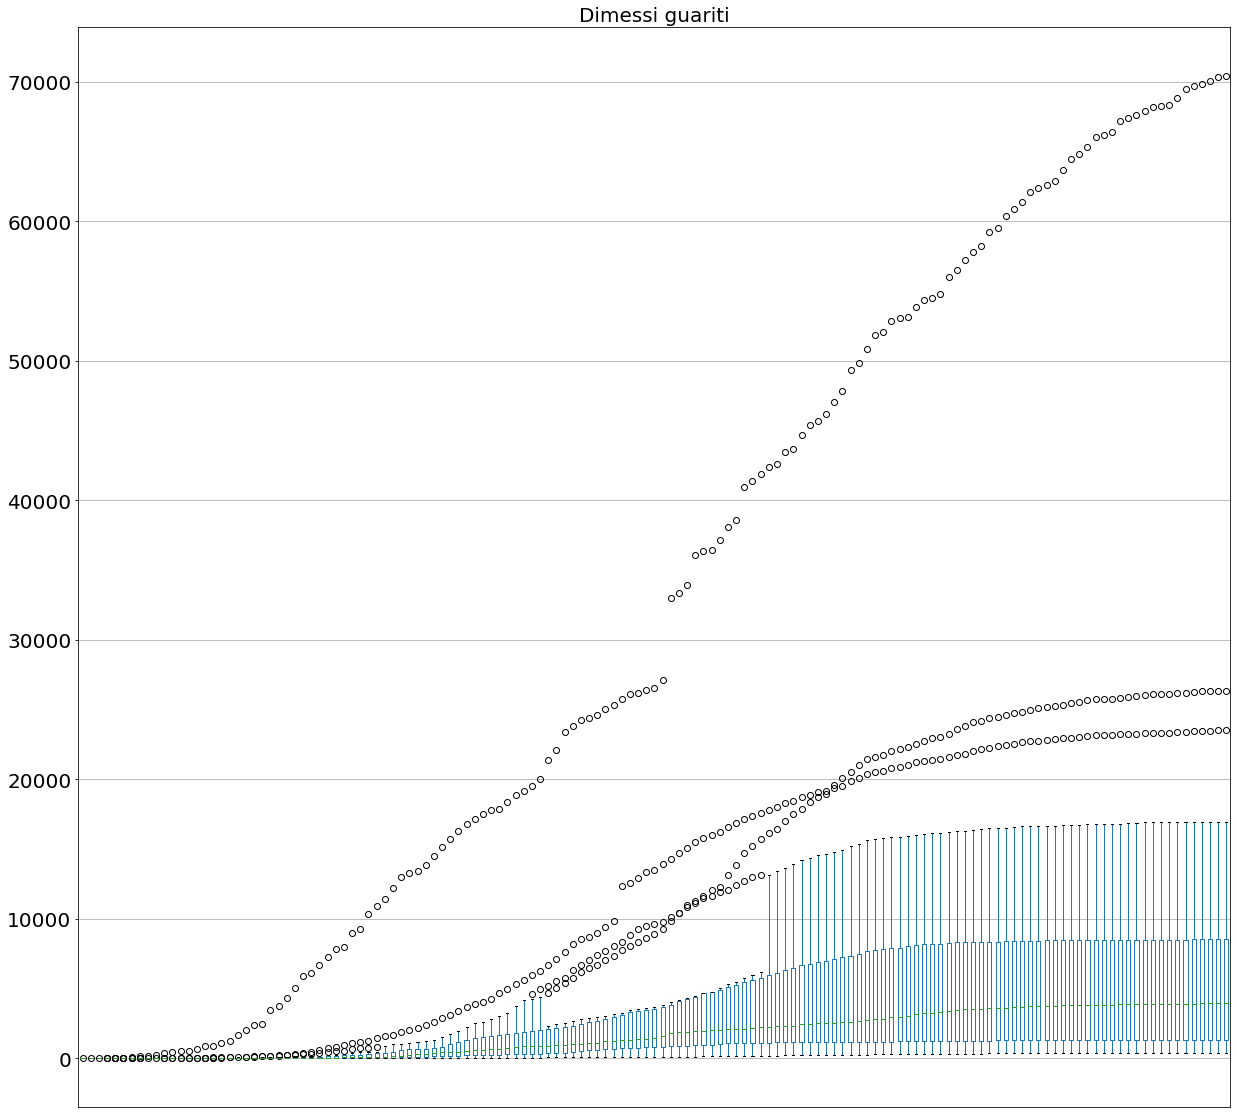

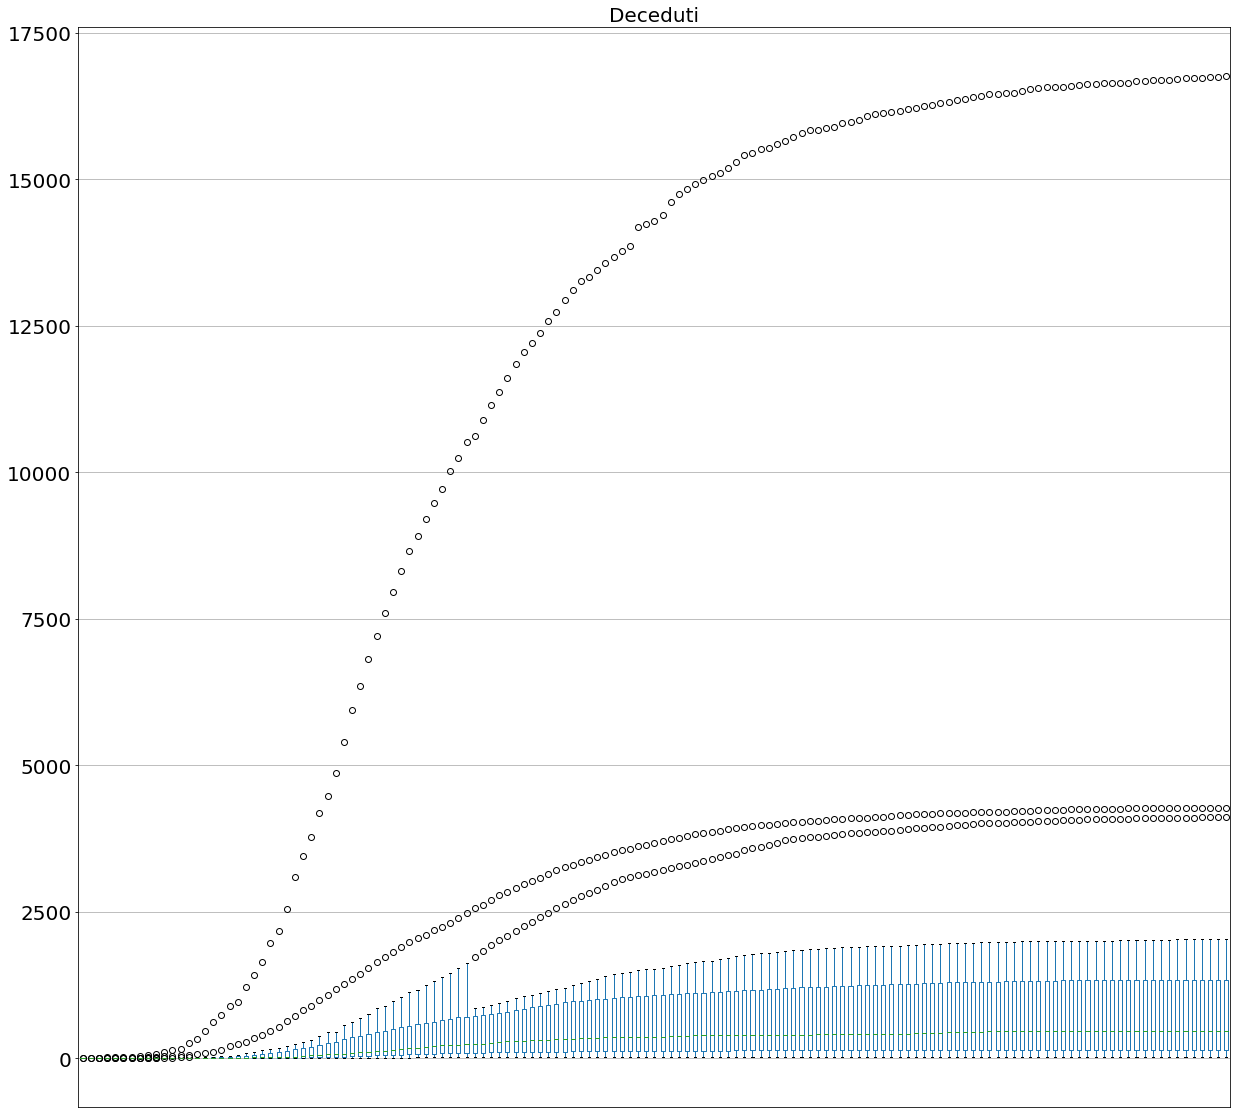

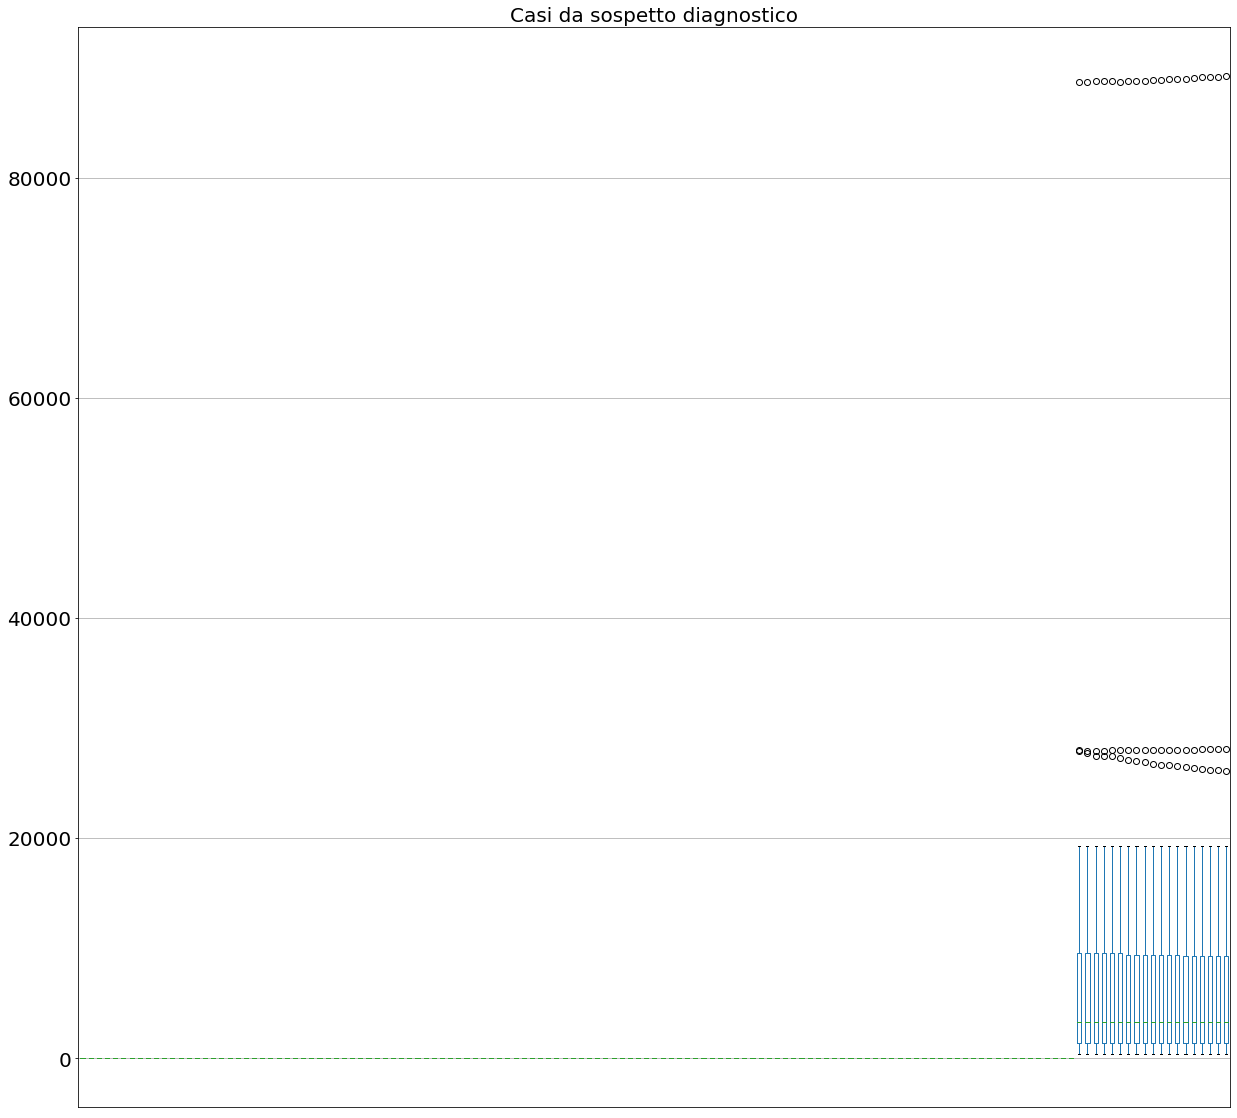

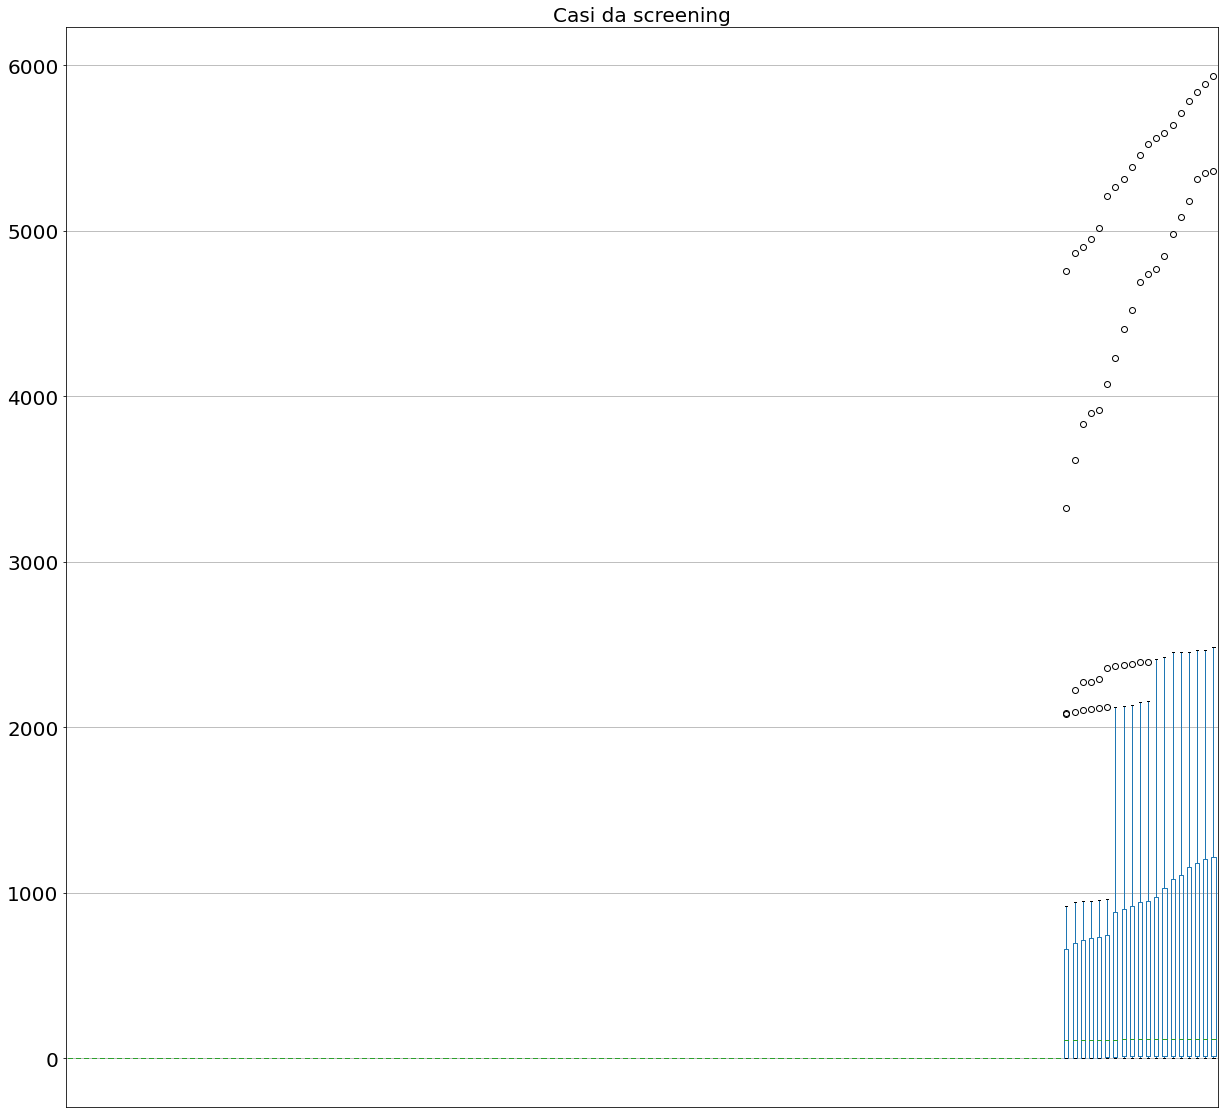

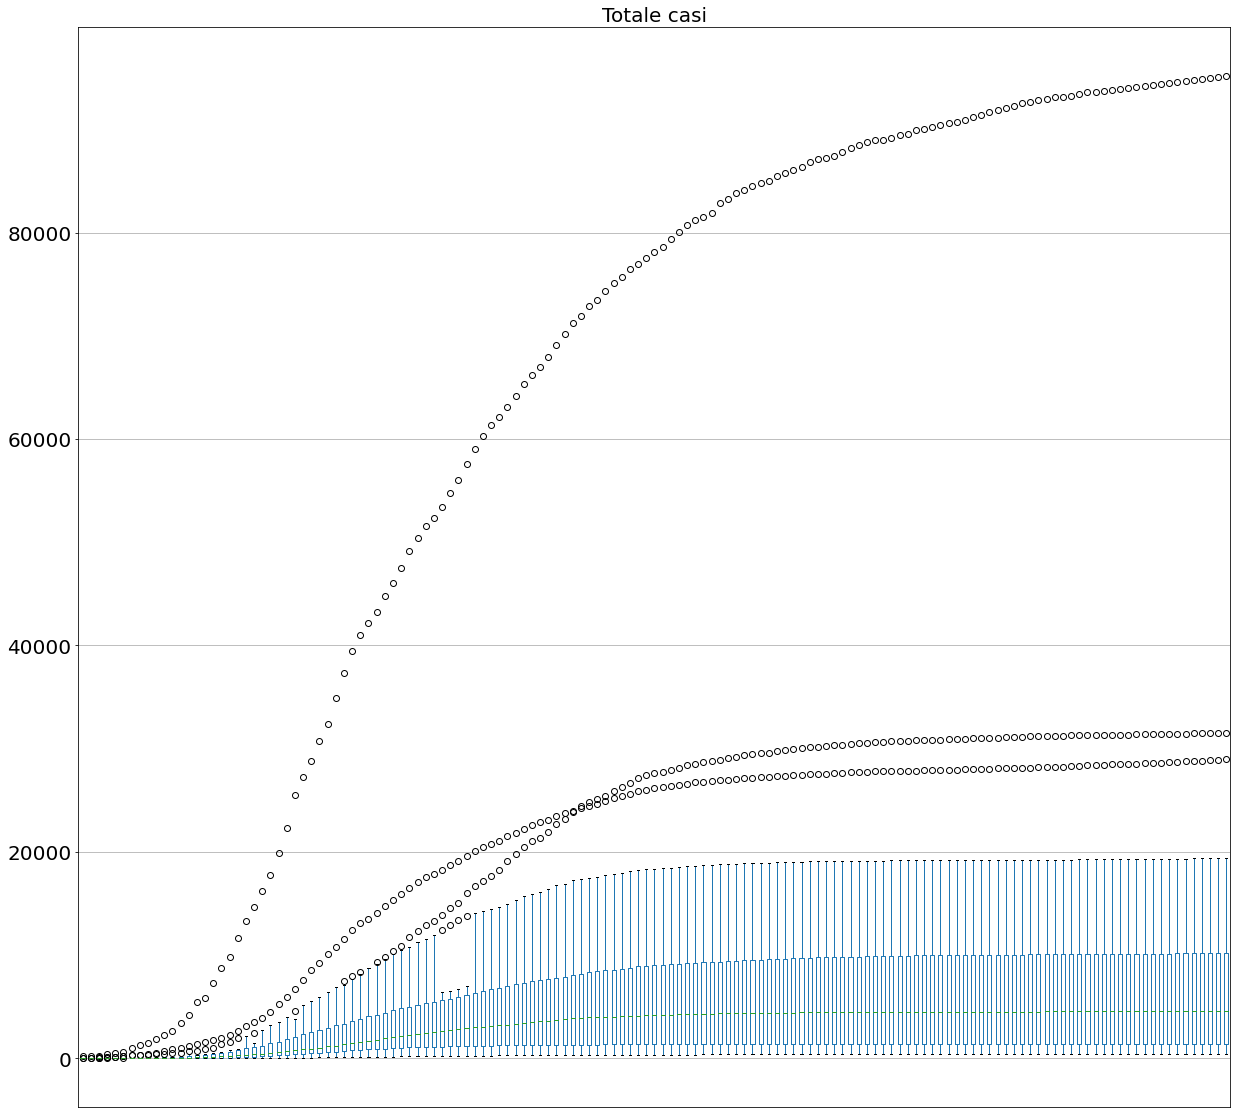

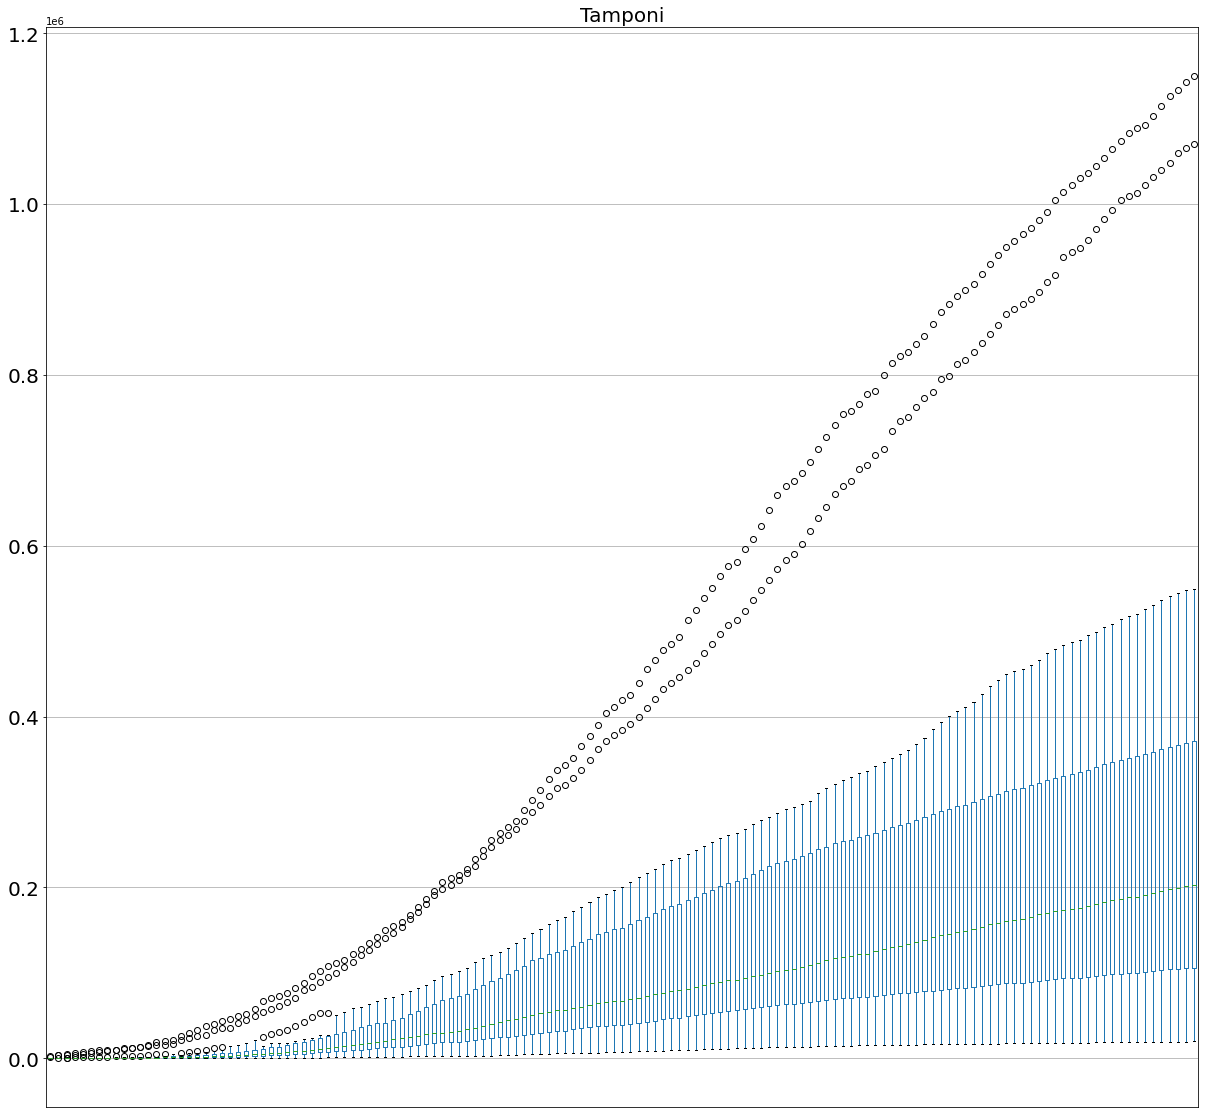

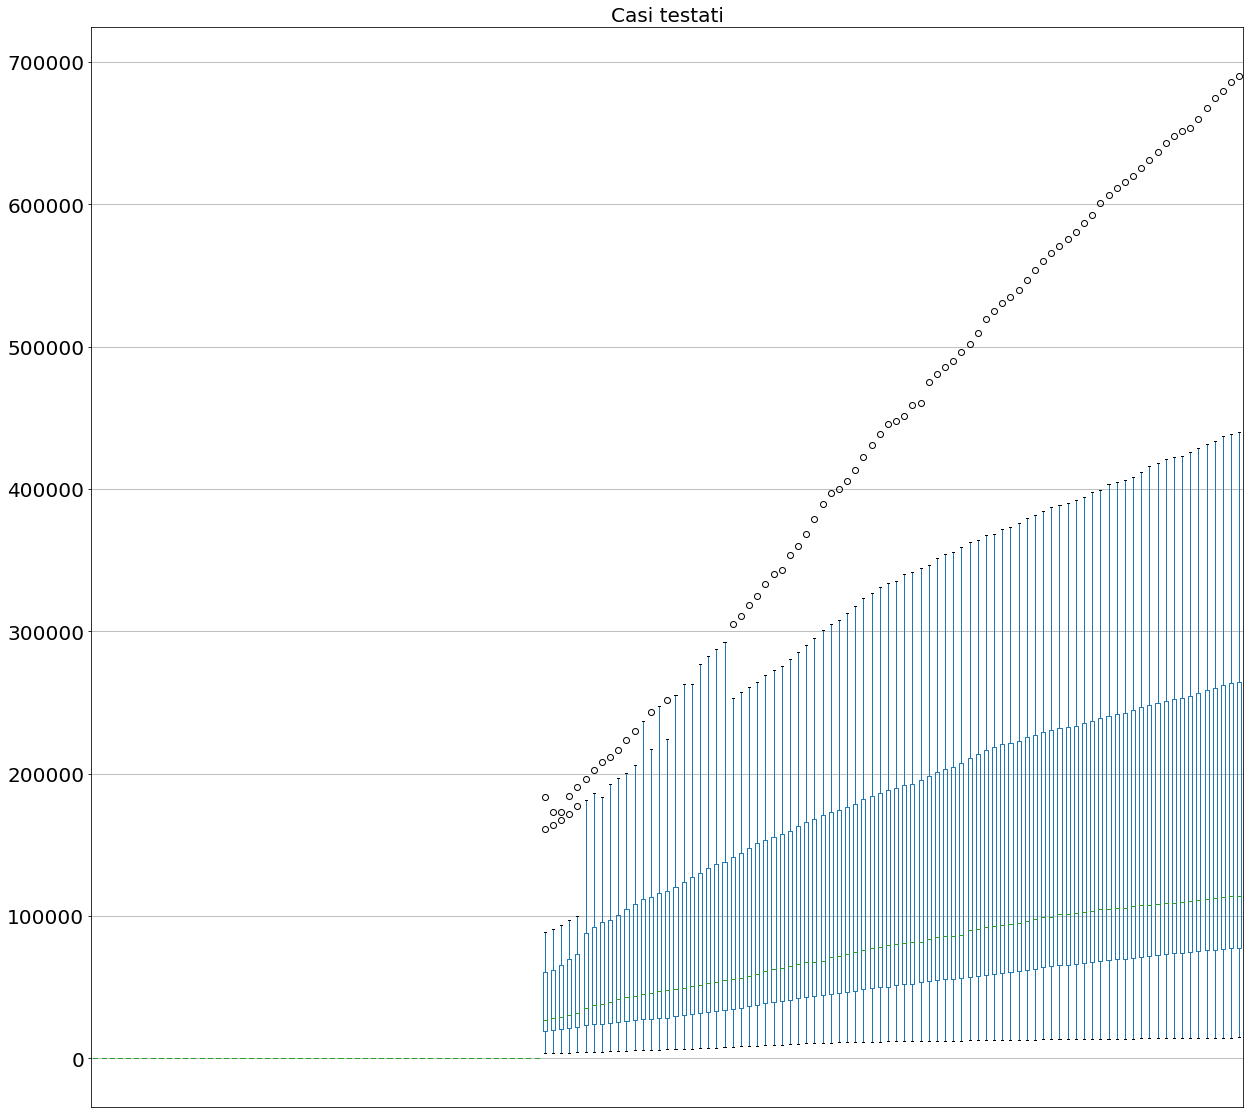

In [33]:
for column in regions.columns[6:-1]:
    ax = regions[['data', column]].boxplot(by = 'data', figsize = (20, 20), fontsize = 20)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.set_title(column.replace('_', ' ').capitalize(), size = 20)
    ax.get_figure().suptitle("")
    ax.xaxis.set_label_text("")

Let's take a look at all data about a single region: Lombardia

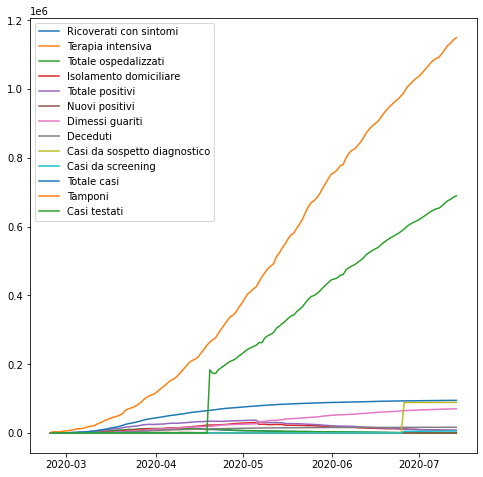

In [34]:
cur_region_name = "Lombardia"
cur_region = regions.loc[regions.denominazione_regione == cur_region_name]
fig = plt.figure(figsize = (8, 8))
for column in cur_region.drop(columns = ['variazione_totale_positivi']).columns[6:-1]:
    plt.plot('data', column, data = cur_region, label = column.replace('_', ' ').capitalize())
    
plt.legend()
plt.show()

We can also combine region and city data (only for 1 column) to se day by day how this number is composed.

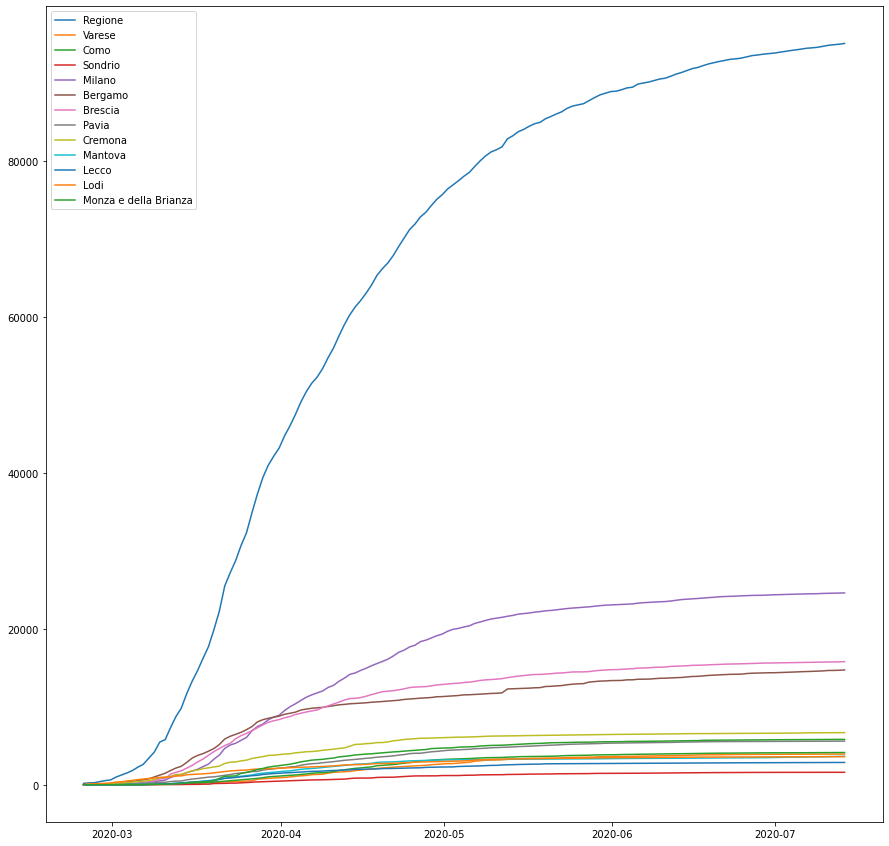

In [35]:
fig = plt.figure(figsize = (15, 15))
all_cities = cities.loc[cities.denominazione_regione == cur_region_name]
plt.plot('data', 'totale_casi', data = cur_region, label = 'Regione')
for city in all_cities.denominazione_provincia.unique():
    cur_city = all_cities.loc[all_cities.denominazione_provincia == city]
    plt.plot('data', 'totale_casi', data = cur_city, label = city)
plt.legend()
plt.show()

Looking at the plot it seems that not data by region and by city are not coherent, we can check it

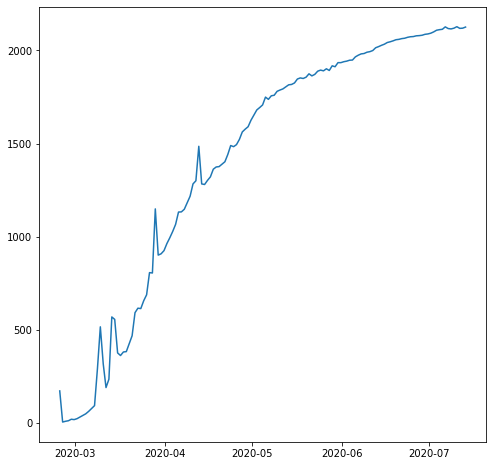

In [36]:
fig = plt.figure(figsize = (8, 8))
region_city = pd.merge(cur_region, all_cities.groupby('data').sum(), on = 'data', \
                       suffixes = ["_reg", "_cit"])
region_city['totale_casi'] = region_city['totale_casi_reg'] - region_city['totale_casi_cit']
plt.plot('data', 'totale_casi', data = region_city, label = "Regione - Totale città")
plt.show()

We can put region and city dataframes together and distribute columns of region dataframe among cities of that region (assuming that those columns are in proportion with totale_casi)

In [37]:
cities['frazione_totale_casi'] = cities.groupby(['data', 'denominazione_regione'])['totale_casi'].transform('sum') 
cities['frazione_totale_casi'] = cities['totale_casi'] / cities['frazione_totale_casi']
cities.fillna({'frazione_totale_casi' : 0}, inplace = True)
cities = pd.merge(cities, regions.drop(columns = ['codice_regione', 'lat', 'long', \
                                                  'totale_casi', 'note', 'stato']), \
                  on = ['denominazione_regione', 'data'])
for column in cities.columns[12:]:
    cities[column] = cities[column] * cities['frazione_totale_casi']

We can index the city dataframe basing on areas (country, region, city), so we can easily view data by region or by city

In [39]:
cities = cities.set_index(['stato', 'denominazione_regione', 'denominazione_provincia'])
display(cities)

data  \
stato denominazione_regione denominazione_provincia                       
ITA   Abruzzo               L'Aquila                2020-02-24 18:00:00   
                            Teramo                  2020-02-24 18:00:00   
                            Pescara                 2020-02-24 18:00:00   
                            Chieti                  2020-02-24 18:00:00   
      Basilicata            Potenza                 2020-02-24 18:00:00   
...                                                                 ...   
      Veneto                Belluno                 2020-07-13 17:00:00   
                            Treviso                 2020-07-13 17:00:00   
                            Venezia                 2020-07-13 17:00:00   
                            Padova                  2020-07-13 17:00:00   
                            Rovigo                  2020-07-13 17:00:00   

                                                     codice_regione  \
stato denominazione_regione denominazione_provincia                   
ITA   Abruzzo               L'Aquila                             13   
                            Teramo                               13   
                            Pescara                              13   
                            Chieti                               13   
      Basilicata            Potenza                              17   
...                                                             ...   
      Veneto                Belluno                               5   
                            Treviso                               5   
                            Venezia                               5   
                            Padova                                5   
                            Rovigo                                5   

                                                     codice_provincia  \
stato denominazione_regione denominazione_provincia                     
ITA   Abruzzo               L'Aquila                               66   
                            Teramo                                 67   
                            Pescara                                68   
                            Chieti                                 69   
      Basilicata            Potenza                                76   
...                                                               ...   
      Veneto                Belluno                                25   
                            Treviso                                26   
                            Venezia                                27   
                            Padova                                 28   
                            Rovigo                                 29   

                                                    sigla_provincia  \
stato denominazione_regione denominazione_provincia                   
ITA   Abruzzo               L'Aquila                             AQ   
                            Teramo                               TE   
                            Pescara                              PE   
                            Chieti                               CH   
      Basilicata            Potenza                              PZ   
...                                                             ...   
      Veneto                Belluno                              BL   
                            Treviso                              TV   
                            Venezia                              VE   
                            Padova                               PD   
                            Rovigo                               RO   

                                                           lat       long  \
stato denominazione_regione denominazione_provincia                         
ITA   Abruzzo               L'Aquila                 42.351222  13.398438   
                            Teramo                   42.658918